# Homework 1 - Professionalism & Reproducibility
### DATA 512 - Human-Centered Data Science
#### Aamir Darukhanawalla

### Analysis Question:
##### How did masking policies change the progression of confirmed COVID-19 cases from February 1, 2020 through October 1, 2021?

#### Import the required libraries

In [152]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

In [58]:
# Set assigned county as Hudson
COUNTY = 'Hudson'

#### Read the data for US Confirmed Cases

In [3]:
df_us_cases = pd.read_csv('Data/RAW_us_confirmed_cases.csv')

In [39]:
df_us_cases.head()

,Province_State,Admin2,UID,iso2,iso3,code3,FIPS,Country_Region,Lat,Long_,...,10/21/22,10/22/22,10/23/22,10/24/22,10/25/22,10/26/22,10/27/22,10/28/22,10/29/22,10/30/22
0,Alabama,Autauga,84001001,US,USA,840,1001.0,US,32.539527,-86.644082,...,18480,18480,18480,18480,18480,18480,18511,18511,18511,18511
1,Alabama,Baldwin,84001003,US,USA,840,1003.0,US,30.727750,-87.722071,...,65895,65895,65895,65895,65895,65895,65973,65973,65973,65973
2,Alabama,Barbour,84001005,US,USA,840,1005.0,US,31.868263,-85.387129,...,6926,6926,6926,6926,6926,6926,6930,6930,6930,6930
3,Alabama,Bibb,84001007,US,USA,840,1007.0,US,32.996421,-87.125115,...,7560,7560,7560,7560,7560,7560,7575,7575,7575,7575
4,Alabama,Blount,84001009,US,USA,840,1009.0,US,33.982109,-86.567906,...,17286,17286,17286,17286,17286,17286,17320,17320,17320,17320


In [38]:
# Confirmed cases data for Hudson County
df_us_cases[df_us_cases['Admin2'] == COUNTY]

,Province_State,Admin2,UID,iso2,iso3,code3,FIPS,Country_Region,Lat,Long_,...,10/21/22,10/22/22,10/23/22,10/24/22,10/25/22,10/26/22,10/27/22,10/28/22,10/29/22,10/30/22
1852,New Jersey,Hudson,84034017,US,USA,840,34017.0,US,40.737662,-74.075157,...,217629,217720,217804,217815,217940,218066,218216,218390,218687,218687


In [35]:
# Get the time series for Hudson county confirmed cases from 2/1/20 to 10/1/20
ts_hudson_cases = df_us_cases[
                      df_us_cases['Admin2'] == COUNTY
                  ].iloc[
                      0, df_us_cases.columns.get_loc('2/1/20') : df_us_cases.columns.get_loc('10/1/21') + 1
                  ].rename('{} Cases'.format(COUNTY))

In [159]:
ts_hudson_cases.tail()

9/27/21    95450
9/28/21    95515
9/29/21    95589
9/30/21    95687
10/1/21    95777
Name: Hudson Cases, dtype: object

Text(0, 0.5, 'Confirmed cases')

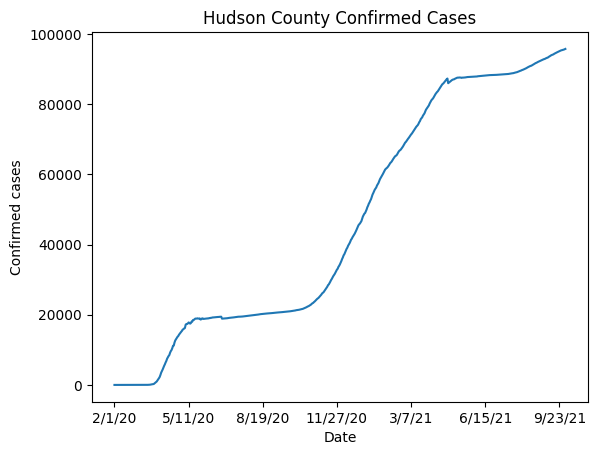

In [175]:
ts_hudson_cases.plot()
plt.title('Hudson County Confirmed Cases')
plt.xlabel('Date')
plt.ylabel('Confirmed cases')

#### Read data for the mask survey

In [42]:
df_mask_use = pd.read_csv('Data/mask-use-by-county.csv')

In [59]:
# Get the survey results for Hudson county
df_mask_use[df_mask_use['COUNTYFP'] == int(df_us_cases.loc[df_us_cases['Admin2'] == COUNTY, 'FIPS'])]

,COUNTYFP,NEVER,RARELY,SOMETIMES,FREQUENTLY,ALWAYS
1782,34017,0.022,0.019,0.077,0.211,0.67


#### Read the mask mandate data

In [71]:
df_mask_mandate = pd.read_csv('Data/mask-mandate.csv')

In [82]:
# Get the mask mandate data for Hudson county
ts_mask_mandate = df_mask_mandate[df_mask_mandate['County_Name'] == '{} County'.format(COUNTY)].set_index('date')['Face_Masks_Required_in_Public']

In [86]:
ts_mask_mandate.head()

date
4/10/2020    Yes
4/11/2020    Yes
4/12/2020    Yes
4/13/2020    Yes
4/14/2020    Yes
Name: Face_Masks_Required_in_Public, dtype: object

In [160]:
ts_mask_mandate.tail()

date
8/11/2021    No
8/12/2021    No
8/13/2021    No
8/14/2021    No
8/15/2021    No
Name: Face_Masks_Required_in_Public, dtype: object

Text(0, 0.5, 'Had mask mandate')

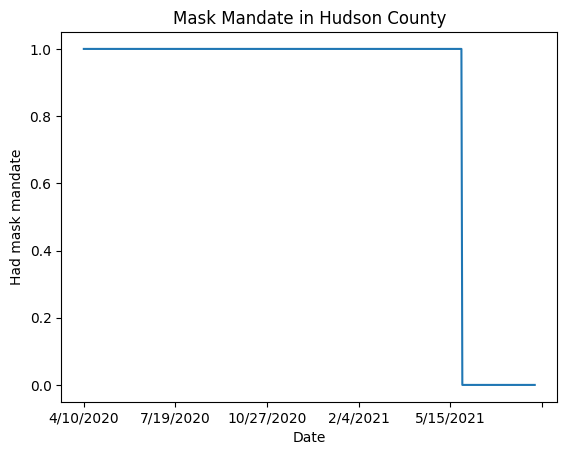

In [176]:
ts_mask_mandate.map({'Yes': 1, 'No': 0}).plot()
plt.title('Mask Mandate in Hudson County')
plt.xlabel('Date')
plt.ylabel('Had mask mandate')

In [100]:
(ts_mask_mandate[:ts_mask_mandate.index.get_loc('5/28/2021')] == 'Yes').all()

True

In [101]:
(ts_mask_mandate[ts_mask_mandate.index.get_loc('5/28/2021'):] == 'No').all()

True

We see that the all dates before 5/28/2021 have a mask mandate in public and all dates on or after 5/28/2021 have no mask mandate.
Hence, the mask mandate was changed only once in Hudson county. On 5/28/2021 the mask mandate in public was changed from 'Yes' to 'No'.

##### Visualizing the confirmed cases with respect to the day the mask mandate was removed in Hudson county.

Text(0, 0.5, 'Confirmed cases')

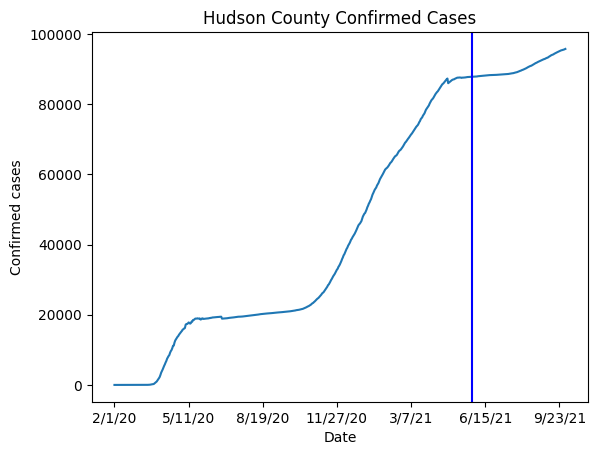

In [168]:
ts_hudson_cases.plot()
plt.axvline(x = ts_hudson_cases.index.get_loc('5/28/21'), color = 'b')
plt.title('Hudson County Confirmed Cases')
plt.xlabel('Date')
plt.ylabel('Confirmed cases')

We take the derivative of the total confirmed cases to get the daily increase in cases.
However, we do notice a number of dates having a negative number of cases. These errors are most likely due to adjustments made to the numbers to offset previous errors. Since such days are very few we can just cut off the daily cases values at zero.

Text(0, 0.5, 'Daily cases')

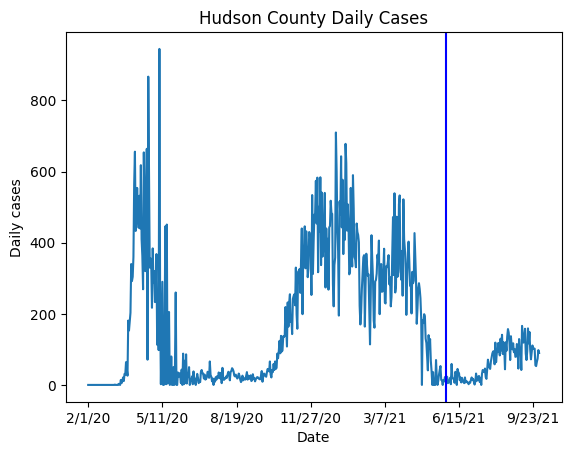

In [169]:
ts_hudson_cases.diff().fillna(ts_hudson_cases).clip(0).plot()
plt.axvline(x = ts_hudson_cases.index.get_loc('5/28/21'), color = 'b')
plt.title('Hudson County Daily Cases')
plt.xlabel('Date')
plt.ylabel('Daily cases')

We are able to see long term trends from the above graph. However, we see a lot of short-term variance. This can be due to biases in the reporting days. We shall be able to see the trends better after taking a moving average over the week, i.e. 7-day moving average.

Text(0, 0.5, 'Daily cases')

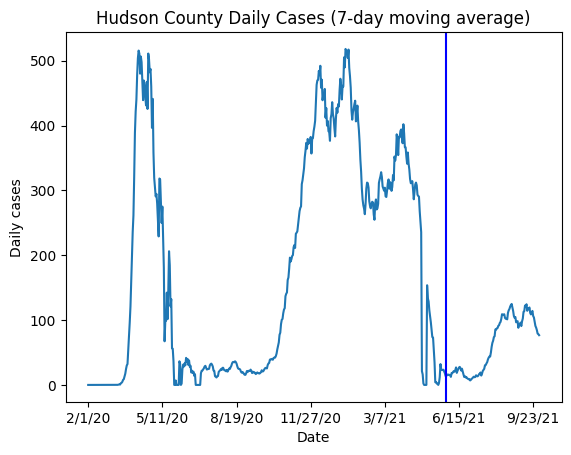

In [171]:
ts_hudson_cases.diff().rolling(7).mean().fillna(ts_hudson_cases).clip(0).plot()
plt.axvline(x = ts_hudson_cases.index.get_loc('5/28/21'), color = 'b')
plt.title('Hudson County Daily Cases (7-day moving average)')
plt.xlabel('Date')
plt.ylabel('Daily cases')

<AxesSubplot: >

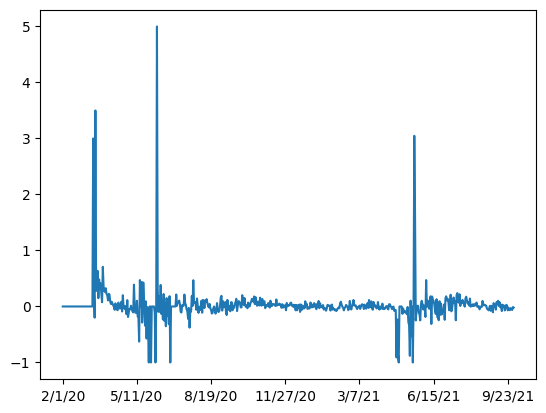

In [173]:
# Plotting the growth rate of new daily cases
ts_hudson_cases.diff().rolling(7).mean().fillna(ts_hudson_cases).clip(0).pct_change().fillna(0).replace(np.inf, 0).clip(-5, 5).plot()

We plot the growth rate for increase in daily covid cases. However, I do not find the graph to valuable to relate to the mask mandate.

### The Final Visualization

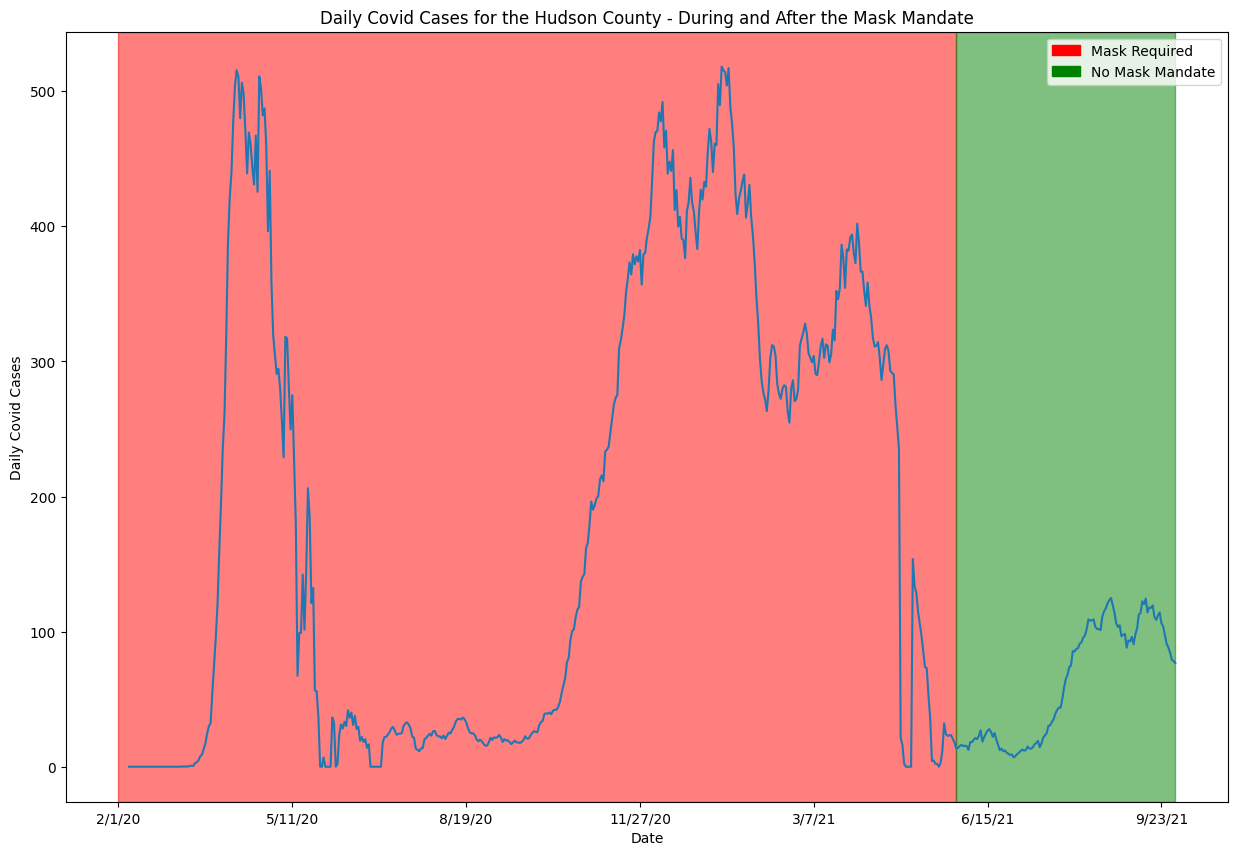

In [174]:
ts_hudson_cases.diff().fillna(ts_hudson_cases).rolling(7).mean().clip(0).plot(figsize=(15, 10))
plt.axvspan(ts_hudson_cases.index.get_loc('2/1/20'), ts_hudson_cases.index.get_loc('5/28/21'), color='red', alpha=0.5)
plt.axvspan(ts_hudson_cases.index.get_loc('5/28/21'), ts_hudson_cases.index.get_loc('10/1/21'), color='green', alpha=0.5)
plt.title('Daily Covid Cases for the Hudson County - During and After the Mask Mandate')
plt.xlabel('Date')
plt.ylabel('Daily Covid Cases')
plt.legend(handles=[mpatches.Patch(color='red', label='Mask Required'), mpatches.Patch(color='green', label='No Mask Mandate')])
plt.savefig('Hudson county daily cases.png')
plt.show()